In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 6.4 MB/s eta 0:00:00


**Importing** **Libraries**

In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")


**Import Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_set.xlsx to data_set.xlsx


In [ ]:
dataset1 = pd.read_csv("synthetic_data_set.csv")

In [ ]:
# Preview data
dataset1.head()

,Genetic Predisposition,Gene Interactions,Family History,Geographical Factors,Global Incidence Rates,Within-Country Variations,Age,Viral Infections,Autoimmune Conditions,Ethnicity,Environmental Triggers,Perinatal Factors
0,9,4,4,3,3,8,7,3,5,9,4,7
1,1,6,1,6,5,5,9,3,4,6,4,8
2,3,4,1,3,2,7,9,4,9,3,3,6
3,6,4,2,6,4,2,5,8,4,3,2,6
4,9,4,4,6,3,9,5,3,9,5,2,6


## **Data Analysis and Cleaning Process**

In [ ]:
# Dataset dimensions - (rows, columns)
dataset1.shape

(500, 12)

In [ ]:
# Features data-type
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Genetic Predisposition     500 non-null    int64
 1   Gene Interactions          500 non-null    int64
 2   Family History             500 non-null    int64
 3   Geographical Factors       500 non-null    int64
 4   Global Incidence Rates     500 non-null    int64
 5   Within-Country Variations  500 non-null    int64
 6   Age                        500 non-null    int64
 7   Viral Infections           500 non-null    int64
 8   Autoimmune Conditions      500 non-null    int64
 9   Ethnicity                  500 non-null    int64
 10  Environmental Triggers     500 non-null    int64
 11  Perinatal Factors          500 non-null    int64
dtypes: int64(12)
memory usage: 47.0 KB


In [ ]:
# Statistical summary
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Genetic Predisposition,500.0,5.726,3.019463,1.0,3.00,6.0,9.0,9.0
Gene Interactions,500.0,4.692,0.741779,4.0,4.00,5.0,5.0,6.0
Family History,500.0,3.028,2.315586,1.0,1.00,2.0,5.0,7.0
Geographical Factors,500.0,4.356,1.117032,3.0,3.00,4.0,5.0,6.0
Global Incidence Rates,500.0,3.588,1.195456,2.0,2.75,3.0,5.0,5.0
Within-Country Variations,500.0,7.262,2.327271,2.0,6.00,9.0,9.0,9.0
Age,500.0,5.950,1.110841,5.0,5.00,6.0,6.0,9.0
Viral Infections,500.0,5.106,2.038400,3.0,3.00,5.0,7.0,8.0
Autoimmune Conditions,500.0,5.940,1.747715,4.0,4.00,6.0,7.0,9.0
Ethnicity,500.0,5.378,2.189224,3.0,3.00,5.0,7.0,9.0


In [ ]:
# Assuming the last column is the target (adjust based on your dataset)
X = dataset1.iloc[:, :-1]  # All columns except the last
y = dataset1.iloc[:, -1]   # Last column as target


In [ ]:
# Count of null values
dataset1.isnull().sum()

,0
Genetic Predisposition,0
Gene Interactions,0
Family History,0
Geographical Factors,0
Global Incidence Rates,0
Within-Country Variations,0
Age,0
Viral Infections,0
Autoimmune Conditions,0
Ethnicity,0


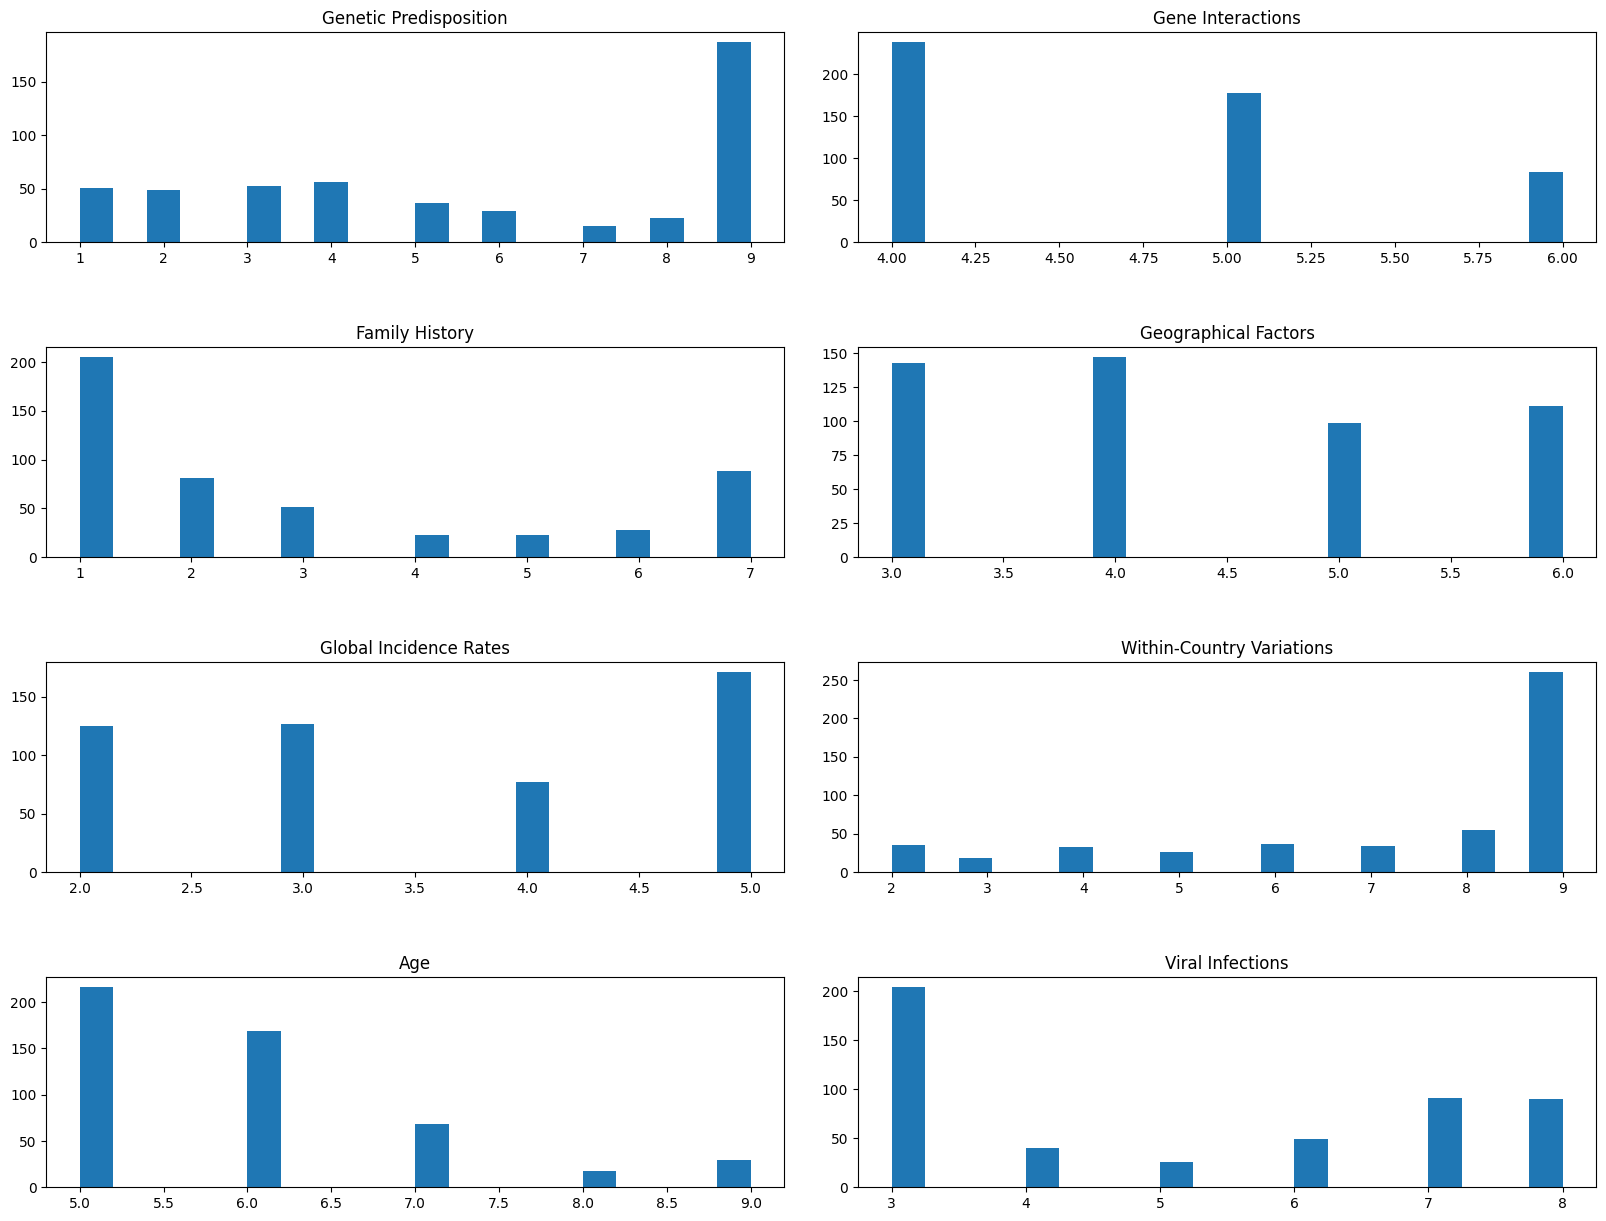

In [ ]:
# Histogram of each feature
import itertools

col = dataset1.columns[:8]
fig, axes = plt.subplots(figsize = (20, 15), nrows=int(len(col)/2) + (len(col) % 2), ncols=2) # Create subplots with correct dimensions
fig.subplots_adjust(wspace=0.1, hspace=0.5)
# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
  if i < len(col):  # To avoid index errors if axes > colums
    ax.hist(dataset1[col[i]], bins=20) # Plot hist on current axes
    ax.set_title(col[i])

plt.show()

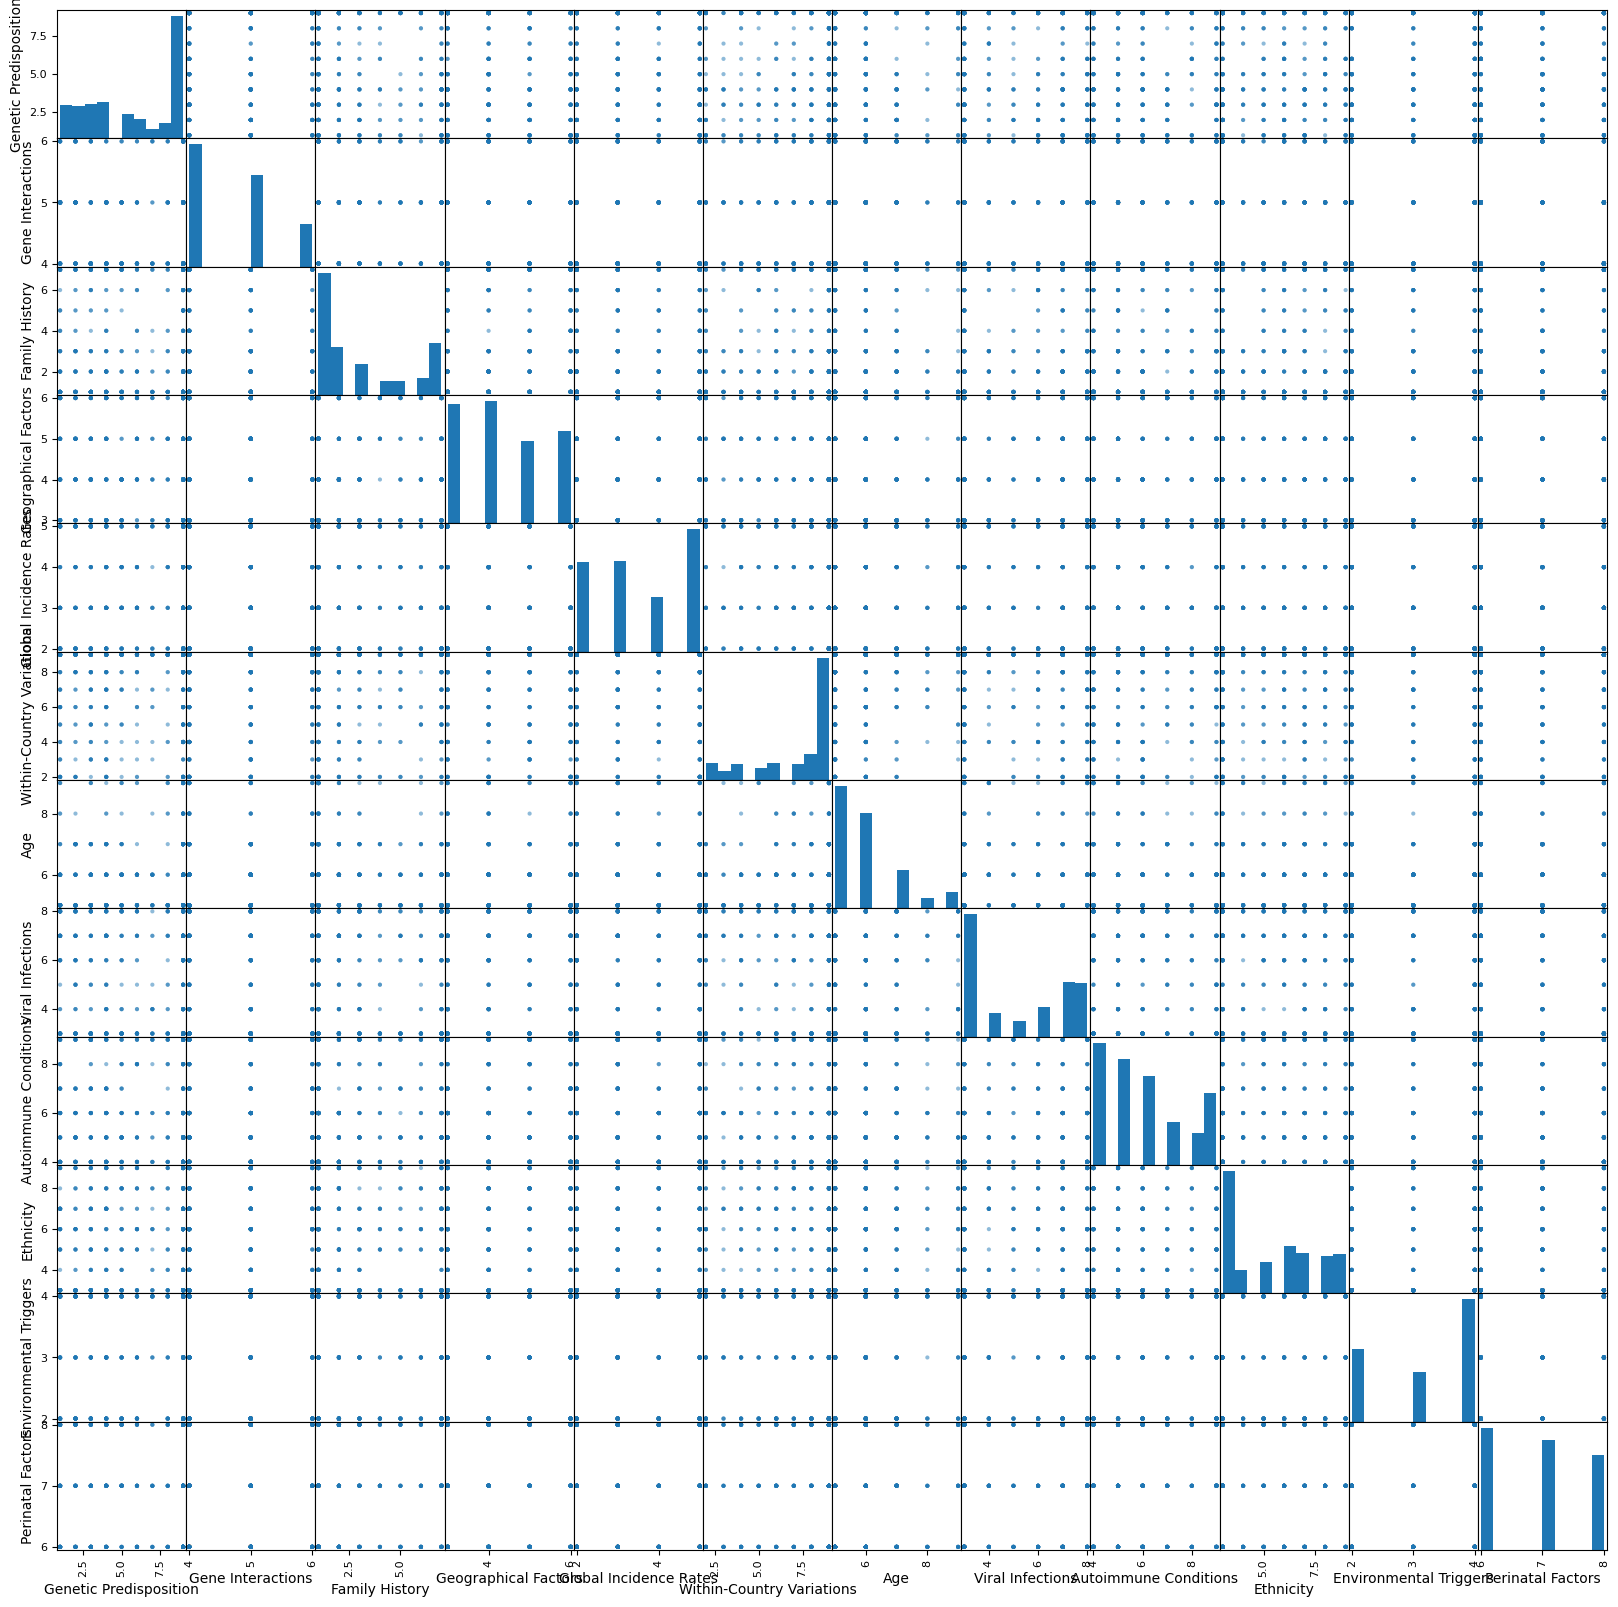

In [ ]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix # Import scatter_matrix from pandas.plotting instead of pandas.tools.plotting
scatter_matrix(dataset1, figsize = (20, 20)); # Also changed dataset to dataset1, as dataset is not defined

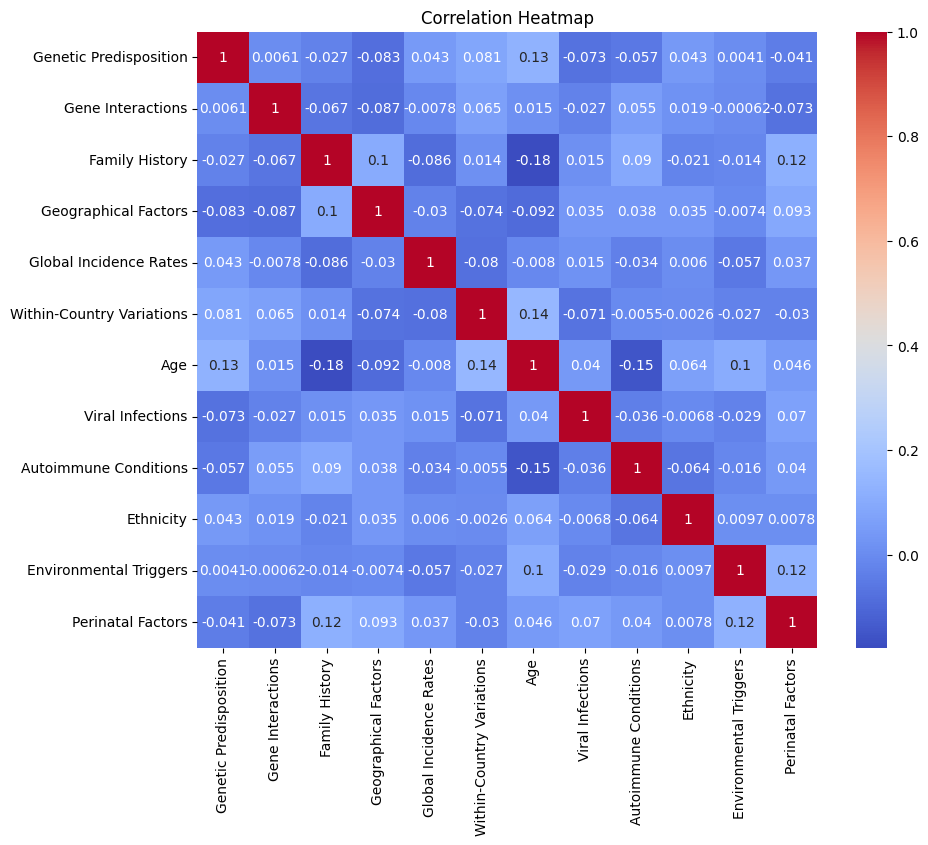

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Handling Missing** **Values**

In [ ]:
#Handling missing values
dataset1.isnull().values.any()


False

## **Outliers Detection**

In [ ]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in dataset1:

    Q1 = dataset1[feature].quantile(0.25)
    Q3 = dataset1[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if dataset1[(dataset1[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Genetic Predisposition no
Gene Interactions no
Family History no
Geographical Factors no
Global Incidence Rates no
Within-Country Variations no
Age yes
Viral Infections no
Autoimmune Conditions no
Ethnicity no
Environmental Triggers no
Perinatal Factors no


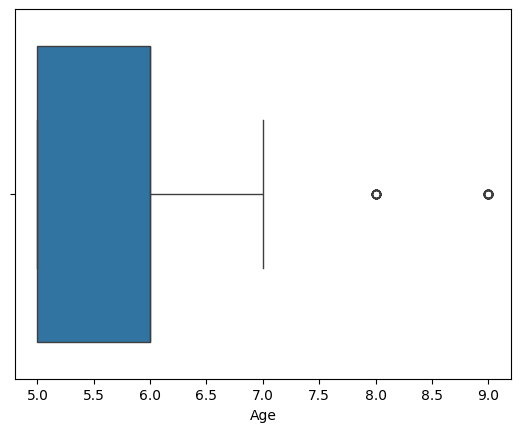

In [ ]:

import seaborn as sns
sns.boxplot(x = dataset1["Age"]);

In [ ]:
#finding the IQR
Q1 = dataset1["Age"].quantile(0.25)
Q3 = dataset1["Age"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
#remove outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#now trimming
dataset1 = dataset1[(dataset1["Age"] >= lower_bound) & (dataset1["Age"] <= upper_bound)]

In [ ]:
#now capping
dataset1["Age"] = np.where(dataset1["Age"] < lower_bound, lower_bound, dataset1["Age"])
dataset1["Age"] = np.where(dataset1["Age"] > upper_bound, upper_bound, dataset1["Age"])

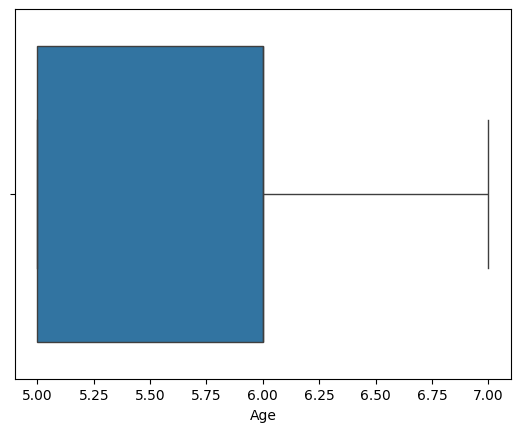

In [ ]:
#now show in graph
sns.boxplot(x = dataset1["Age"]);

**Clustering**

In [ ]:
#We don't have an outcome or output row that's why I used Clustering
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset1)  # Standardize features for better clustering

In [ ]:
#Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Define 3 clusters (adjust based on domain knowledge)
dataset1["Cluster"] = kmeans.fit_predict(data_scaled)

In [ ]:
#  Analyze Clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nCluster Labels Assigned to Each Row:")
print(dataset1["Cluster"].value_counts())

Cluster Centers:
[[ 0.09600141  0.19930181 -0.33432736 -0.19811363 -0.0798985   0.1281613
  -0.40216073 -0.17777798 -0.045305   -0.38401165 -0.07232201 -0.77291597]
 [-0.22480222 -0.32208373  0.74036225  0.52042771 -0.1982994  -0.36241203
  -0.51457118  0.14871508  0.45396767 -0.09531619  0.00374764  0.59912246]
 [ 0.10350526  0.07813766 -0.32025635 -0.26703724  0.27827664  0.19709072
   0.94344378  0.06134372 -0.37779301  0.52638705  0.07861805  0.31155745]]

Cluster Labels Assigned to Each Row:
Cluster
0    167
2    147
1    139
Name: count, dtype: int64


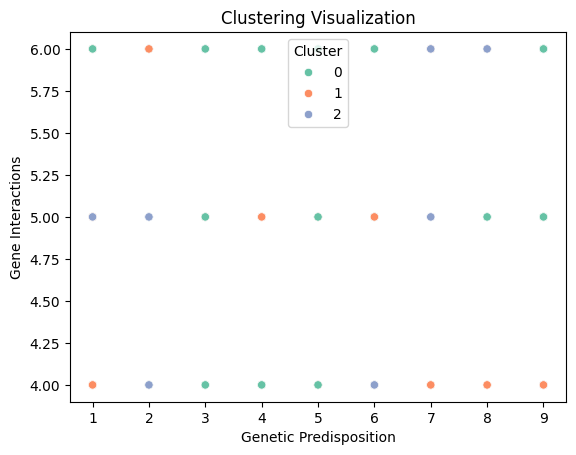

In [ ]:
# Visualize clusters (if applicable, for first two features)
sns.scatterplot(
    x=dataset1.iloc[:, 0], y=dataset1.iloc[:, 1], hue=dataset1["Cluster"], palette="Set2"
)
plt.xlabel(dataset1.columns[0])
plt.ylabel(dataset1.columns[1])
plt.title("Clustering Visualization")
plt.show()


from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Creating a synthetic outcome (high-risk = 1, low-risk = 0)
dataset1["Risk"] = (dataset1["Genetic Predisposition"] > 80) & (dataset1["Family History"] == 1)
dataset1["Risk"] = dataset1["Risk"].astype(int)

print(dataset1["Risk"].value_counts())

Risk
0    453
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

#Why Use a Random Seed?
#When working with random numbers, you might want to reproduce the exact same results, especially during debugging or sharing code with others. Setting a seed ensures that:
#The sequence of random numbers generated will always be the same for the same seed value.
#This makes your experiments reproducible.

np.random.seed(42)
n_samples = 500
dataset1 = pd.DataFrame({
    "Genetic Predisposition": np.random.rand(n_samples) * 100,
    "Gene Interactions": np.random.rand(n_samples) * 50,
    "Family History": np.random.randint(0, 2, n_samples),
    "Geographical Factors": np.random.rand(n_samples) * 20,
    "Global Incidence Rates": np.random.rand(n_samples) * 10,
    "Within-Country Variations": np.random.rand(n_samples) * 15,
    "Age": np.random.randint(0, 80, n_samples),
    "Viral Infections": np.random.randint(0, 2, n_samples),
    "Autoimmune Conditions": np.random.randint(0, 2, n_samples),
    "Ethnicity": np.random.randint(1, 5, n_samples),  # Categorical encoded as numbers
    "Environmental Triggers": np.random.rand(n_samples) * 30,
    "Perinatal Factors": np.random.randint(0, 2, n_samples),
})

# Define risk thresholds and create individual Risk columns for each factor
dataset1["Risk_Genetic_Predisposition"] = (dataset1["Genetic Predisposition"] > 80).astype(int)
dataset1["Risk_Gene_Interactions"] = (dataset1["Gene Interactions"] > 30).astype(int)
dataset1["Risk_Family_History"] = (dataset1["Family History"] == 1).astype(int)
dataset1["Risk_Geographical_Factors"] = (dataset1["Geographical Factors"] > 15).astype(int)
dataset1["Risk_Global_Incidence_Rates"] = (dataset1["Global Incidence Rates"] > 8).astype(int)
dataset1["Risk_Within_Country_Variations"] = (dataset1["Within-Country Variations"] > 10).astype(int)
dataset1["Risk_Age"] = (dataset1["Age"] < 18).astype(int)
dataset1["Risk_Viral_Infections"] = (dataset1["Viral Infections"] == 1).astype(int)
dataset1["Risk_Autoimmune_Conditions"] = (dataset1["Autoimmune Conditions"] == 1).astype(int)
dataset1["Risk_Ethnicity"] = (dataset1["Ethnicity"] == 3).astype(int)  # High risk for Ethnicity = 3
dataset1["Risk_Environmental_Triggers"] = (dataset1["Environmental Triggers"] > 20).astype(int)
dataset1["Risk_Perinatal_Factors"] = (dataset1["Perinatal Factors"] == 1).astype(int)

# Display the distribution of high-risk samples for each factor
risk_columns = [col for col in dataset1.columns if col.startswith("Risk_")]
for col in risk_columns:
    print(f"\n{col}:")
    print(dataset1[col].value_counts())

# Display a sample of the dataset with the new Risk columns
print("\nSample dataset with individual Risk columns:")
print(dataset1.head())



Risk_Genetic_Predisposition:
Risk_Genetic_Predisposition
0    394
1    106
Name: count, dtype: int64

Risk_Gene_Interactions:
Risk_Gene_Interactions
0    320
1    180
Name: count, dtype: int64

Risk_Family_History:
Risk_Family_History
0    260
1    240
Name: count, dtype: int64

Risk_Geographical_Factors:
Risk_Geographical_Factors
0    385
1    115
Name: count, dtype: int64

Risk_Global_Incidence_Rates:
Risk_Global_Incidence_Rates
0    399
1    101
Name: count, dtype: int64

Risk_Within_Country_Variations:
Risk_Within_Country_Variations
0    344
1    156
Name: count, dtype: int64

Risk_Age:
Risk_Age
0    402
1     98
Name: count, dtype: int64

Risk_Viral_Infections:
Risk_Viral_Infections
0    258
1    242
Name: count, dtype: int64

Risk_Autoimmune_Conditions:
Risk_Autoimmune_Conditions
1    255
0    245
Name: count, dtype: int64

Risk_Ethnicity:
Risk_Ethnicity
0    377
1    123
Name: count, dtype: int64

Risk_Environmental_Triggers:
Risk_Environmental_Triggers
0    345
1    155
Name: 

In [ ]:
from sklearn.ensemble import IsolationForest

# Step 1: Train an Isolation Forest
isolation_forest = IsolationForest(random_state=42)
dataset1["Anomaly"] = isolation_forest.fit_predict(dataset1)

# Step 2: Analyze results (-1 = anomaly, 1 = normal)
print(dataset1["Anomaly"].value_counts())

Anomaly
-1    445
 1     55
Name: count, dtype: int64


Accuracy: 0.99

Feature Importances:
                           Feature  Importance
0           Genetic Predisposition    0.086400
6                              Age    0.074731
7                 Viral Infections    0.067814
20      Risk_Autoimmune_Conditions    0.066146
19           Risk_Viral_Infections    0.064988
2                   Family History    0.064107
4           Global Incidence Rates    0.059902
12     Risk_Genetic_Predisposition    0.056934
10          Environmental Triggers    0.055973
5        Within-Country Variations    0.055481
8            Autoimmune Conditions    0.050399
1                Gene Interactions    0.048913
14             Risk_Family_History    0.048734
3             Geographical Factors    0.047079
18                        Risk_Age    0.046323
25                         Cluster    0.022379
24                         Anomaly    0.020518
9                        Ethnicity    0.018538
17  Risk_Within_Country_Variations    0.008605
13          Risk_Gene_I

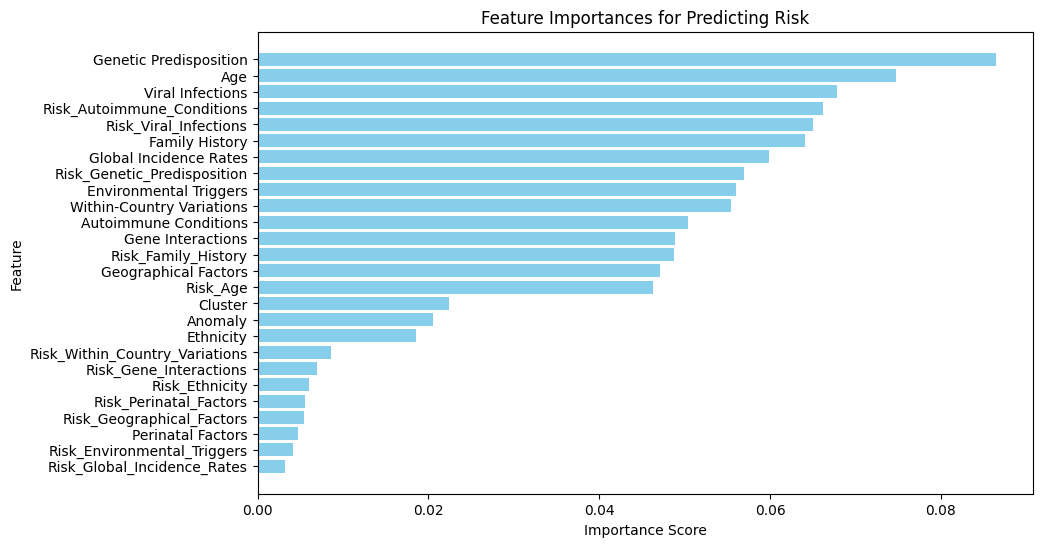

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
dataset1["Risk"] = (
    (dataset1["Genetic Predisposition"] > 80) |
    (dataset1["Family History"] == 1) |
    (dataset1["Age"] < 18) |
    (dataset1["Viral Infections"] == 1) |
    (dataset1["Autoimmune Conditions"] == 1)
).astype(int)

# Separate features and target
X = dataset1.drop(columns=["Risk"])
y = dataset1["Risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Extract feature importance
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the most important factors
print("\nFeature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for Predicting Risk")
plt.gca().invert_yaxis()
#download this full graph
plt.savefig('feature_importances for predicting risk.png')
plt.show()

## **Check Metrics: Calculate precision, recall, and F1-score**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.99 ± 0.01


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.99      1.00      0.99       138

    accuracy                           0.99       150
   macro avg       0.99      0.92      0.95       150
weighted avg       0.99      0.99      0.99       150



# **Analyze Confusion Matrix**

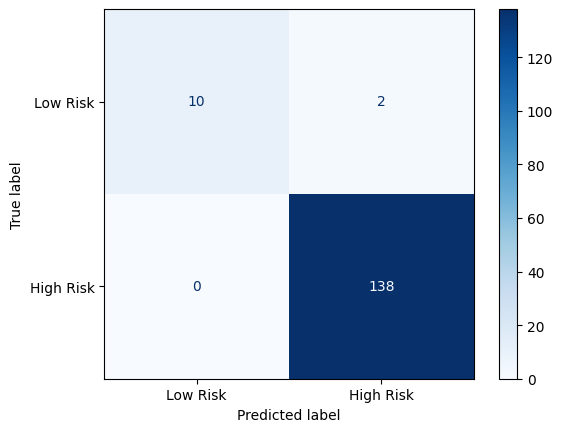

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Risk", "High Risk"])
disp.plot(cmap="Blues")
plt.show()

**ROC-AUC: Measures the model's ability to distinguish between classes.**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.99      1.00      0.99       138

    accuracy                           0.99       150
   macro avg       0.99      0.92      0.95       150
weighted avg       0.99      0.99      0.99       150

ROC-AUC: 1.00


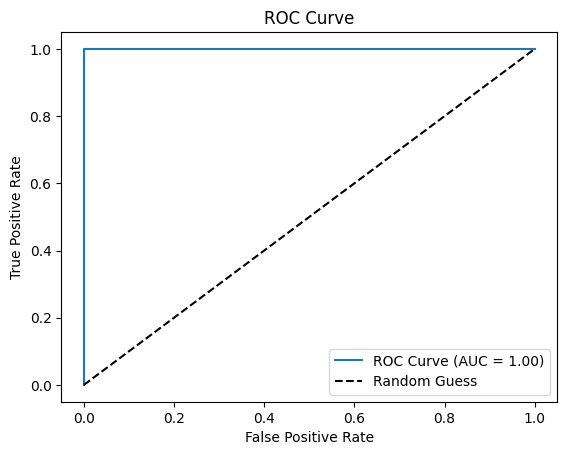

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate on test data
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Handle Class Imbalance:**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
new_threshold = 0.4  # Example threshold
y_pred_adjusted = (y_prob > new_threshold).astype(int)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 1.00


Use Advanced Metrics:

## **Evaluate with metrics like ROC-AUC to assess overall discriminative ability**

In [ ]:
false_positives = X_test[(y_test == 0) & (y_pred == 1)]
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]

print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

False Positives: 2
False Negatives: 0


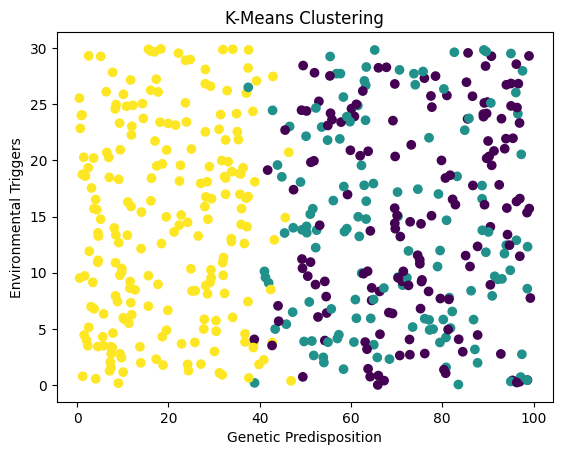

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Generate random data for visualization
kmeans = KMeans(n_clusters=3, random_state=42)
# Replace 'data' with 'dataset1'
dataset1['Cluster'] = kmeans.fit_predict(dataset1.drop(columns=['Risk']))
plt.scatter(dataset1['Genetic Predisposition'], dataset1['Environmental Triggers'], c=dataset1['Cluster'], cmap='viridis')
plt.xlabel('Genetic Predisposition')
plt.ylabel('Environmental Triggers')
plt.title('K-Means Clustering')
#download this graph
plt.savefig('kmeans_clusters.png')
plt.show()

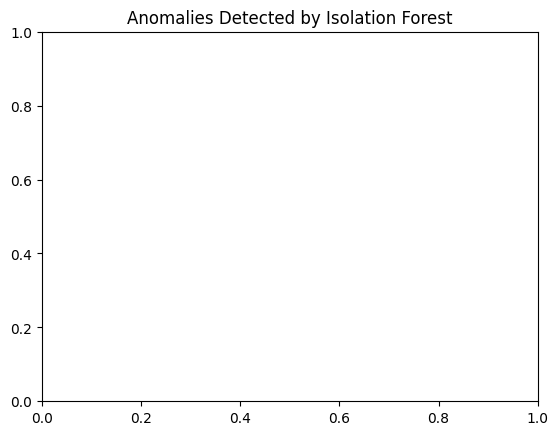

In [ ]:
from sklearn.ensemble import IsolationForest
import seaborn as sns

iso_forest = IsolationForest(random_state=42)
dataset1['Anomaly'] = iso_forest.fit_predict(dataset1.drop(columns=['Risk', 'Cluster']))
sns.boxplot(dataset1=dataset1, orient='h')
plt.title('Anomalies Detected by Isolation Forest')
plt.show()